<a href="https://colab.research.google.com/github/DolaChakraborty12/Gigatech_Attachment/blob/main/Bangla_Headline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer
import re
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Bengali_News_Headline.xlsx - Sheet1.csv")  # Replace with actual dataset filename




In [ ]:
df

,NewsType,Headline
0,অর্থনীতি,‘২০ রোজার মধ্যে পাটকল শ্রমিকদের মজুরি দিন’
1,খেলাধুলা,"‘২০০’ ডাকছে, তামিম রাঙাতে পারবেন তো?"
2,মতামত,‘২০টি মডেল ভবন তৈরি করে দেখান’
3,বাংলাদেশ,‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’
4,খেলাধুলা,‘৯০ মাইল বেগে বল করলেই গ্রেট হওয়া যায় না’
...,...,...
8597,আন্তর্জাতিক,হ্যারি-মেগানের সন্তান ব্রিটিশ সিংহাসন পাবে?
8598,অর্থনীতি,হ্যারি-মেগানের সন্তানকে কর দিতে হবে যুক্তরাষ্ট্রে
8599,বিনোদন,হ্যালিকে হ্যালির শুভকামনা
8600,শিক্ষা,হ্যালো বাংলাদেশ!


In [ ]:
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r"[^\u0980-\u09FF\s]", "", text)  # Keep Bengali characters
    return text.strip()

df['Headline'] = df['Headline'].apply(clean_text)

In [ ]:
df

,NewsType,Headline
0,অর্থনীতি,২০ রোজার মধ্যে পাটকল শ্রমিকদের মজুরি দিন
1,খেলাধুলা,২০০ ডাকছে তামিম রাঙাতে পারবেন তো
2,মতামত,২০টি মডেল ভবন তৈরি করে দেখান
3,বাংলাদেশ,৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার
4,খেলাধুলা,৯০ মাইল বেগে বল করলেই গ্রেট হওয়া যায় না
...,...,...
8597,আন্তর্জাতিক,হ্যারিমেগানের সন্তান ব্রিটিশ সিংহাসন পাবে
8598,অর্থনীতি,হ্যারিমেগানের সন্তানকে কর দিতে হবে যুক্তরাষ্ট্রে
8599,বিনোদন,হ্যালিকে হ্যালির শুভকামনা
8600,শিক্ষা,হ্যালো বাংলাদেশ


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2468 (\N{BENGALI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabt

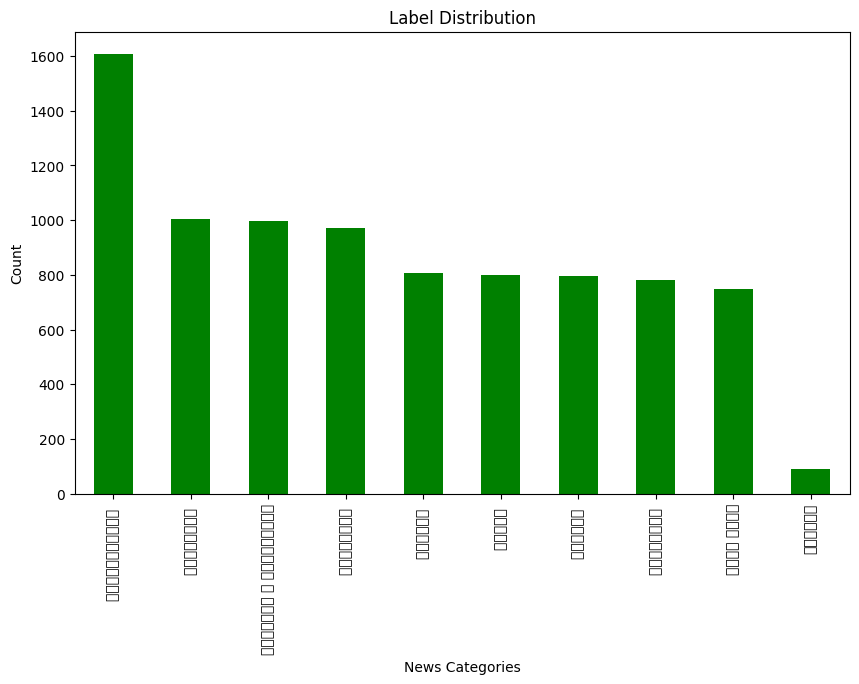

In [ ]:
plt.figure(figsize=(10, 6))
df['NewsType'].value_counts().plot(kind='bar', color='green')
plt.title("Label Distribution")
plt.xlabel("News Categories")
plt.ylabel("Count")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

In [ ]:
X = df['Headline']
y = df['NewsType']

# Encode labels
label_mapping = {label: idx for idx, label in enumerate(df['NewsType'].unique())}
df['label'] = df['NewsType'].map(label_mapping)

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, df['label'], test_size=0.2, random_state=42)


In [ ]:
MODEL_NAME = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(label_mapping))

# Tokenize data
def tokenize_function(texts):
    return tokenizer(texts, padding="max_length", truncation=True, max_length=128)

train_encodings = tokenizer(list(X_train), padding=True, truncation=True, max_length=128)
val_encodings = tokenizer(list(X_val), padding=True, truncation=True, max_length=128)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class BengaliNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = BengaliNewsDataset(train_encodings, list(y_train))
val_dataset = BengaliNewsDataset(val_encodings, list(y_val))


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to=[]
)

# Metrics calculation
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,1.294600,1.277204,0.650203,0.640333,0.657017,0.650203
2,1.014600,1.043555,0.690877,0.687247,0.695732,0.690877
3,0.509200,1.061055,0.709471,0.712894,0.724243,0.709471
4,0.457500,1.118070,0.714120,0.716918,0.722751,0.714120
5,0.262000,1.205017,0.725160,0.725946,0.729250,0.725160


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=2155, training_loss=0.8692115036628086, metrics={'train_runtime': 280.1971, 'train_samples_per_second': 122.789, 'train_steps_per_second': 7.691, 'total_flos': 335950655231940.0, 'train_loss': 0.8692115036628086, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 1.0435550212860107,
 'eval_accuracy': 0.6908773968622893,
 'eval_f1': 0.6872471966482405,
 'eval_precision': 0.6957320091674607,
 'eval_recall': 0.6908773968622893,
 'eval_runtime': 3.2726,
 'eval_samples_per_second': 525.889,
 'eval_steps_per_second': 33.002,
 'epoch': 5.0}

In [ ]:
import torch

def predict(texts):
    # Ensure tokenizer output tensors are moved to the same device as the model
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Encode the input texts and move them to the correct device
    encodings = tokenizer(texts, padding=True, truncation=True, max_length=128, return_tensors="pt").to(device)

    # Get model predictions
    outputs = model(**encodings)

    # Perform argmax to get predicted class indices
    predictions = torch.argmax(outputs.logits, dim=-1)

    # Map predicted indices to labels
    return [list(label_mapping.keys())[pred.item()] for pred in predictions]

# Test with unseen data
test_headlines = [
    "১২৪৪০ কিলোমিটার দৌড়ে আফ্রিকা থেকে লন্ডনে যাওয়া অ্যাথলেট বর্ণবাদের শিকার"
]
predicted_categories = predict(test_headlines)
print(predicted_categories)


['আন্তর্জাতিক ']
